# Lab 0: `lab0-visualization-auto_mpg.ipynb`
### Author: Jashraj Dubal
### UCID: 30047888

In [1]:
# Import libraries
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Set styling
plt.style.use(style="dark_background")
plt.rcParams['font.size'] = 12
plt.rcParams['grid.alpha'] = 0.3

In [2]:
# Load the dataset
data = pd.read_fwf('auto-mpg.data', header=None, na_values='?')
data.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car name']

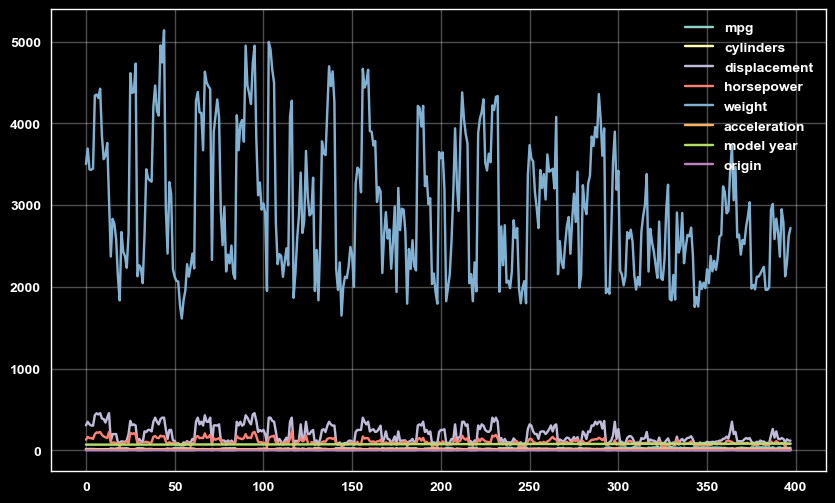

In [189]:
# Try plotting all columns
plt.rcParams['figure.figsize'] = (10, 6)
data.plot();

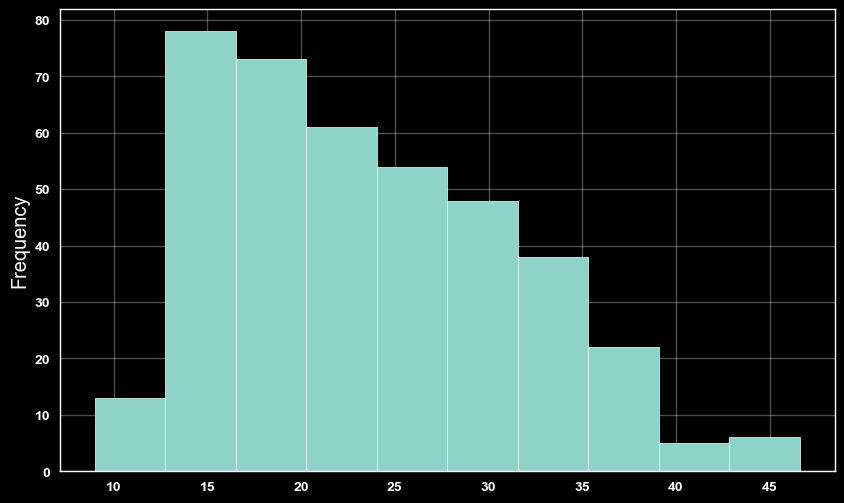

In [190]:
# Plot the mpg distribution
data['mpg'].plot.hist();

In [120]:
# Number of different origin samples
data['origin'].value_counts()

1    249
3     79
2     70
Name: origin, dtype: int64

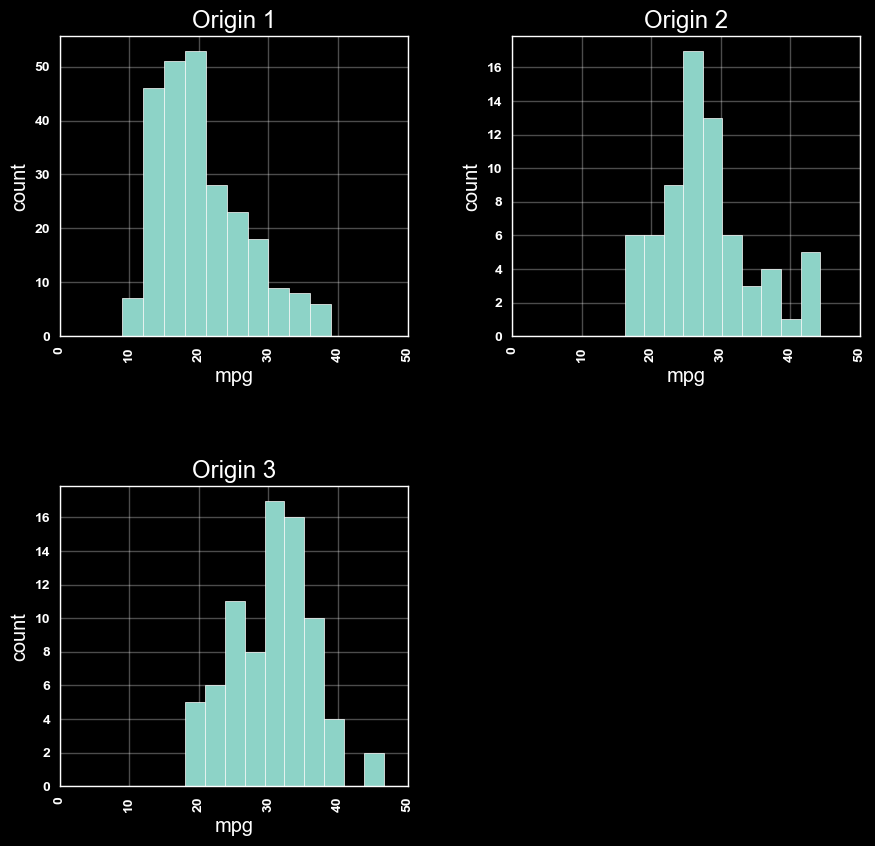

In [191]:
# Plot histogram for mpg for each origin side-by-side
plt.rcParams['figure.figsize'] = (10, 10)
axes = data.hist(column='mpg', by='origin');
axes[0,0].set(xlabel='mpg', ylabel='count', title='Origin 1', xlim=[0,50]);
axes[0,1].set(xlabel='mpg', ylabel='count', title='Origin 2', xlim=[0,50]);
axes[1,0].set(xlabel='mpg', ylabel='count', title='Origin 3', xlim=[0,50]);

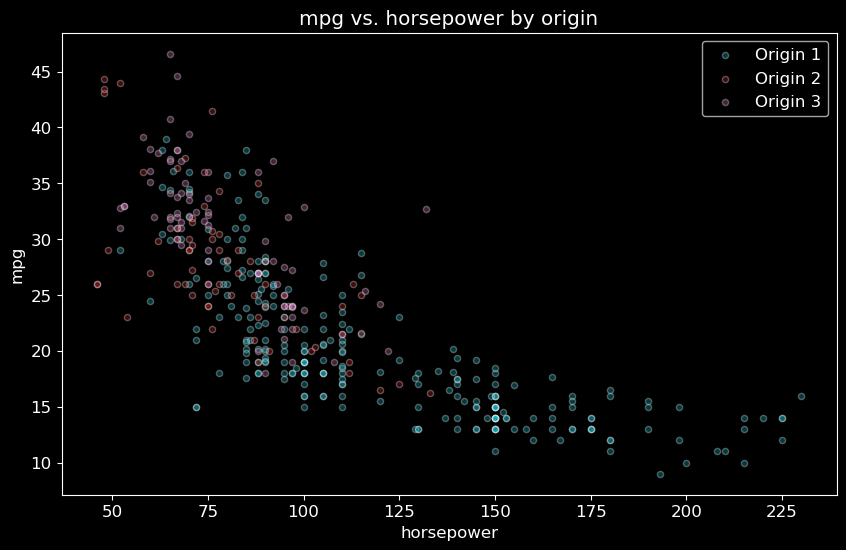

In [7]:
# Create a scatter plot of mpg vs. horsepower and compare it with origin to find correlation
colors = {1: 'tab:cyan', 2: 'tab:red', 3: 'tab:pink'}
plt.rcParams['figure.figsize'] = (10, 6)
fig, ax = plt.subplots()
ax.grid(True, alpha=0.3)
for key, group  in data.groupby('origin'):
    group.plot.scatter(x='horsepower', y='mpg', ax=ax, label='Origin '+str(key), title='mpg vs. horsepower by origin', c=colors[key], alpha=0.3, edgecolors='white');

In [28]:
# Import Seaborn
import seaborn as sns

# Set styling
plt.rcParams['grid.alpha'] = 0.7
pallet = {1: 'tab:cyan', 2: 'tab:red', 3: 'tab:pink'}

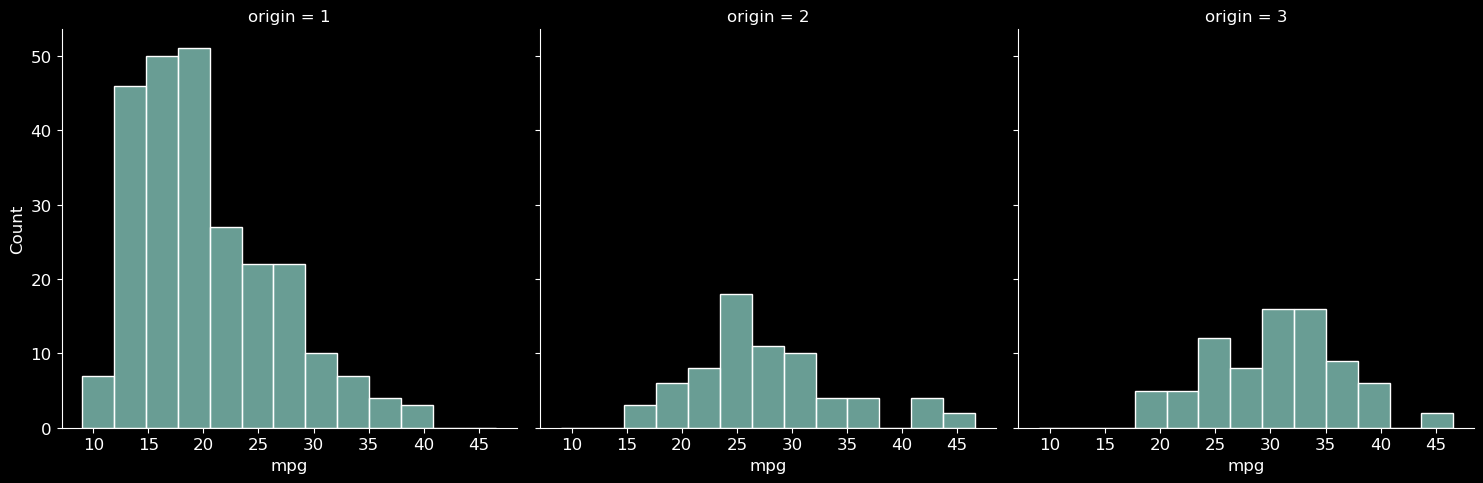

In [9]:
# Re-creating histogram for mpg for each origin side-by-side using Seaborn
sns.displot(x='mpg', col='origin', data=data);

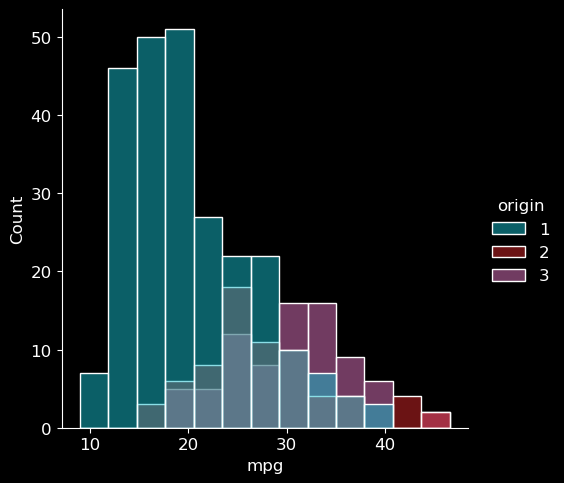

In [29]:
# Displaying the plots on top of each other
sns.displot(x='mpg', hue='origin', data=data, palette=pallet);

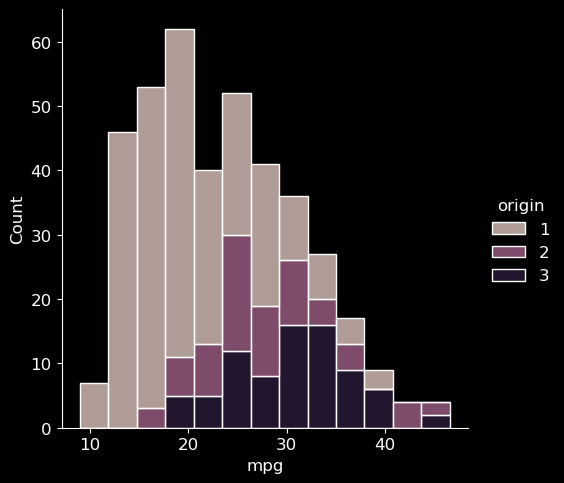

In [16]:
# Stack the counts of mpg on top of each other to see the split between the different origin types
sns.displot(x='mpg', hue='origin', multiple='stack', data=data, palette=pallet);

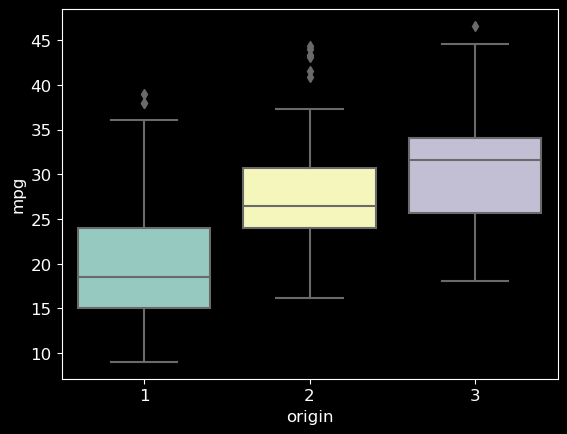

In [17]:
# Use boxplot to look at the difference in mpg between origin types
sns.boxplot(x='origin', y='mpg', data=data);

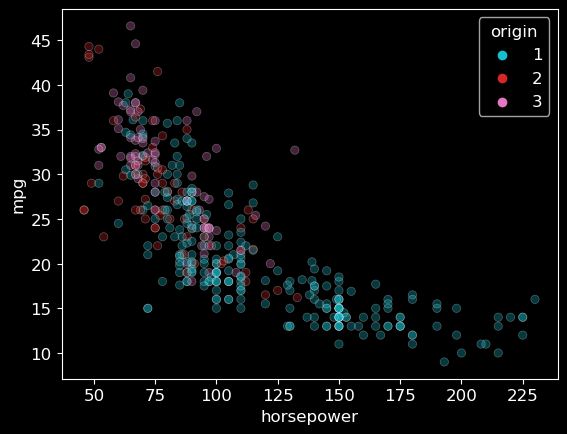

In [30]:
# Use a scatter plot to look at the relationship between mpg and horsepower by origin type
ax = sns.scatterplot(x='horsepower', y='mpg', hue='origin', data=data, alpha=0.3, palette=pallet);

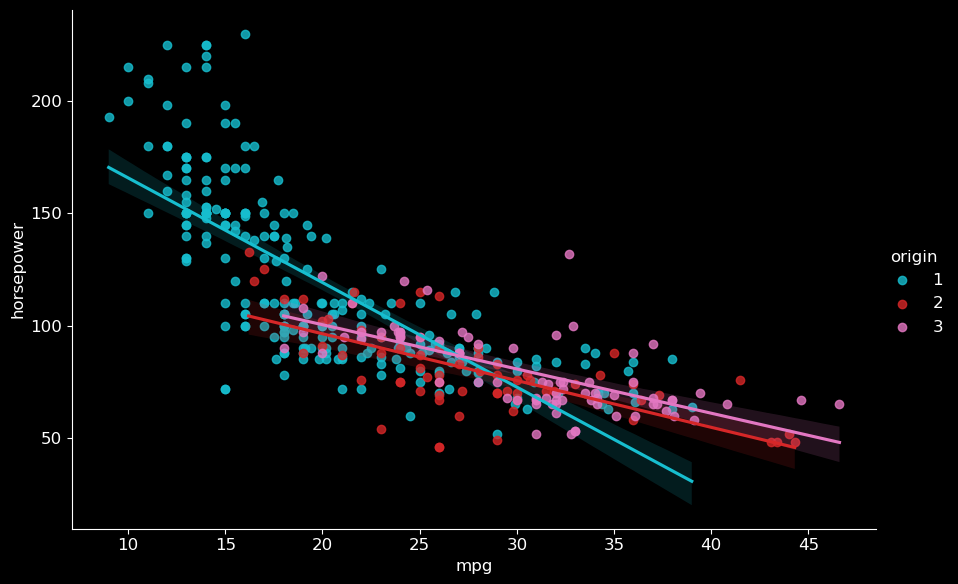

In [31]:
# Addding a regression line to help visualize the relationship
ax = sns.lmplot(x='mpg', y='horsepower', data=data, hue='origin', height=6, aspect=1.5, palette=pallet);

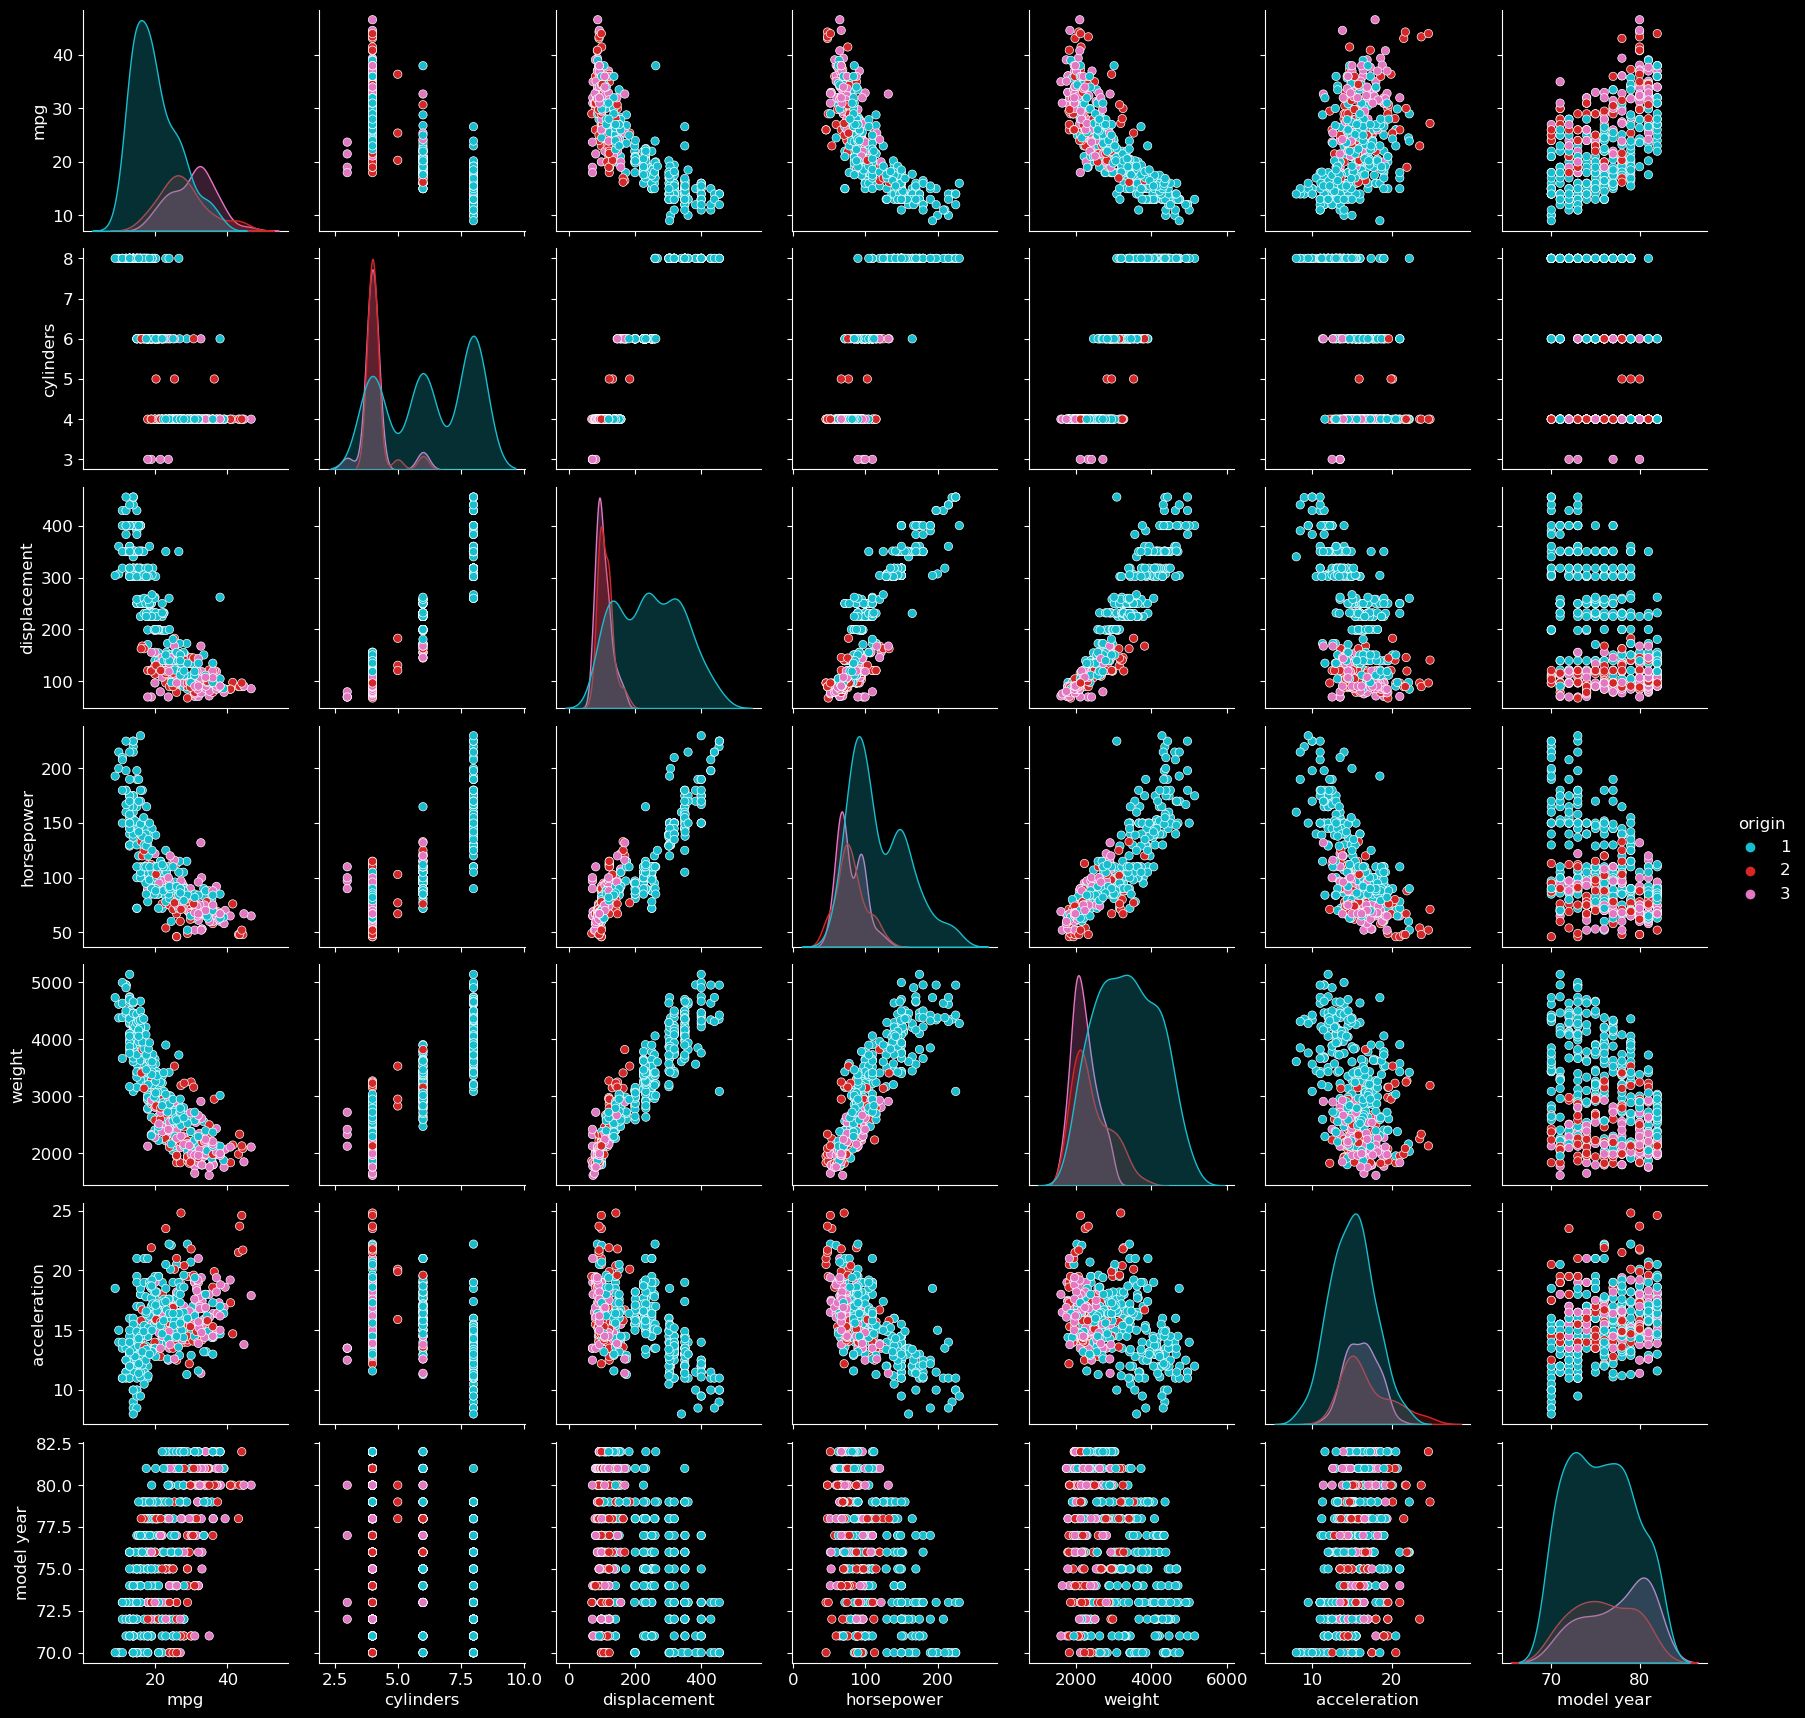

In [32]:
# Pairplot to look at the relationship between all the variables
sns.pairplot(data, hue='origin', palette=pallet);

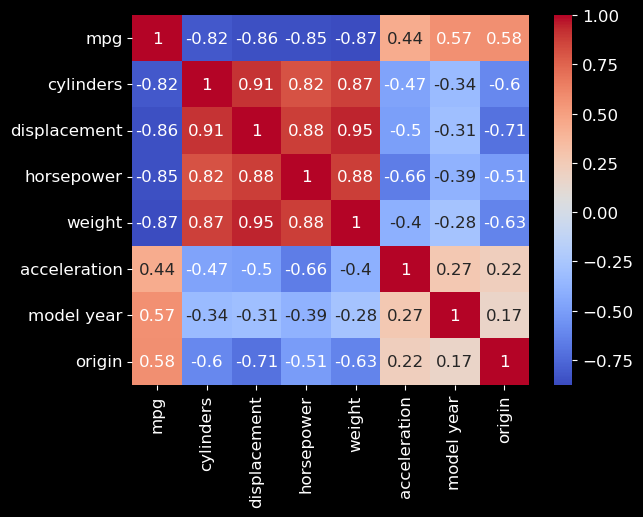

In [34]:
# Visualize the correlation matrix as a heatmap
g = sns.heatmap(data.corr(method='spearman'), annot=True, cmap='coolwarm');